# Espectograma

Neste notebook avaliamos o espectograma. Esta é uma ferramenta que nos permite avaliar a evolução do espectro no tempo. Basicamente tomamos transformadas de Fourier de pequenas janelas temporais que vão se deslocando com o tempo. Geramos então um mapa de cores em que a cor representa a magintude do espectro vs. tempo vs. frequência.

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
from scipy import signal
import IPython.display as ipd # to play signals
import sounddevice as sd
import soundfile as sf

In [13]:
##### x(t) Grilo #################
xg, Fs = sf.read('FallFieldCricket.wav')
xt = xg[:,0]
time = np.linspace(0, (len(xg)-1)/Fs, len(xg))
ipd.Audio(xt, rate=Fs) # load a NumPy array

In [17]:
##### x(t) Clarinete #################
xg, Fs = sf.read('B_Clarinet.wav')
tg = np.linspace(0, (len(xg)-1)/Fs, len(xg))

time = tg[tg<=18]
xt = xg[tg<=18]
ipd.Audio(xt, rate=Fs) # load a NumPy array

In [21]:
#### Ruído branco ######################
Fs = 44100
time = np.arange(0, 4, 1/Fs)
xt = np.random.normal(loc = 0, scale = 1, size = len(time))
ipd.Audio(xt, rate=Fs) # load a NumPy array

In [33]:
#### Sweep  ######################
Fs = 44100
time = np.arange(0, 4, 1/Fs)
xt = signal.chirp(time, 100, time[-1], 8000, method='logarithmic')
ipd.Audio(xt, rate=Fs) # load a NumPy array

# Os parâmetros do espectograma

Dê uma olhada na documentação do scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html


- O sinal no tempo
- A frequência de amostragem
- window: A janela temporal desejada
- Overlap: Número de pontos em que teremos uma sobreposição das janelas.
- nfft: Número de pontos da fft (zero padding). Se não for fornecido, é o número de pontos na janela temporal.

## Sem overlap

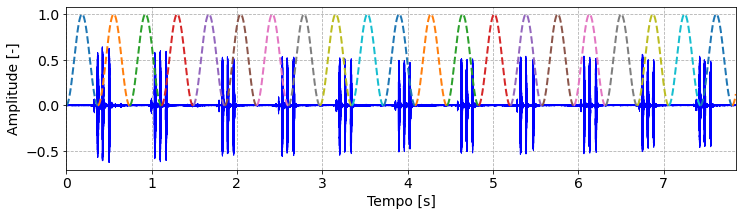

## Com overlap

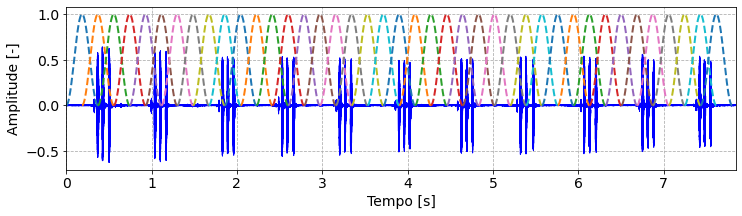

Note que quanto maior for sua janela, mais resolução você terá no espectro. No entanto, você vai perdendo informações sobre a mudança do espectro com o tempo.

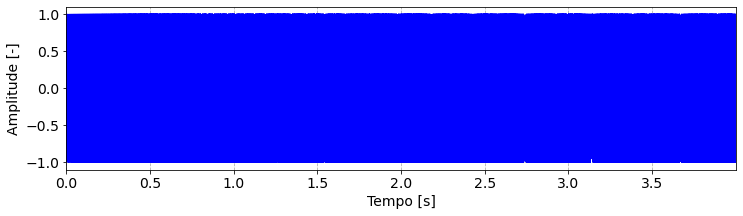

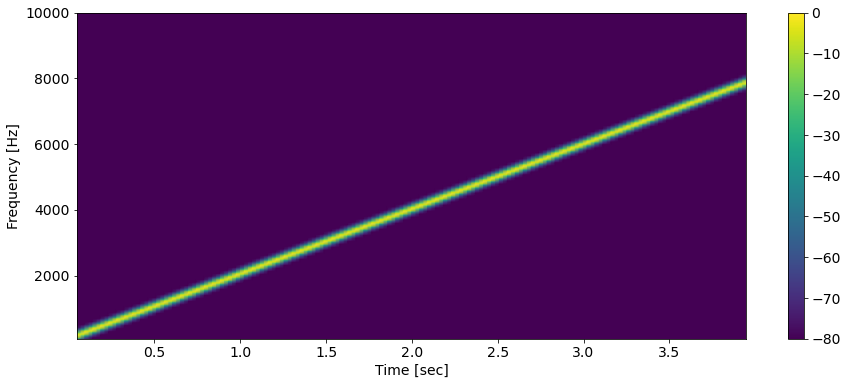

In [34]:
win = signal.windows.hann(4096)
f, t, Sxx = signal.spectrogram(xt, Fs, window = win, noverlap = len(win)/2, scaling = 'spectrum')

plt.figure(figsize=(12,3))
plt.plot(time, xt, '-b', linewidth = 1)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time[-1]))


plt.figure(figsize=(15,6))
p = plt.pcolormesh(t, f, 10*np.log10(Sxx/np.amax(Sxx)), shading='gouraud', vmin = -80)
plt.colorbar(p)
plt.ylim((80, 10000))
#plt.yscale('log')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()